In [1]:
!pip install csbdeep
!pip install spectral

In [2]:
import spectral.io.envi as envi
from spectral import *
import numpy as np

In [3]:
import os
base_path = os.path.abspath('')

In [4]:
img2 = envi.open(base_path + '/Data/F15_20160101_20161231.v4.stable_lights.avg_vis.hdr', base_path + '/Data/F15_20160101_20161231.v4.stable_lights.avg_vis')
img1 = envi.open(base_path + '/Data/SVDNB_npp_20160101-20161231_global_vcm-ntl.avg_rade9_resampled.hdr', base_path + '/Data/SVDNB_npp_20160101-20161231_global_vcm-ntl.avg_rade9_resampled')

In [5]:
#custom function to acquire approximate position of needed point of interest
def get_coordinates(lat, lon):
  lat = -lat + 90
  lon += 180
  lat_conv = 4800 / (-36.1146 + 90)
  lon_conv = 8000 / (180 - 115.1728)
  return int(lat * lat_conv), int(lon * lon_conv)

get_coordinates(55.7512, 37.6184)

(3050, 26855)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 63.0]
    G: [0.0, 63.0]
    B: [0.0, 63.0]

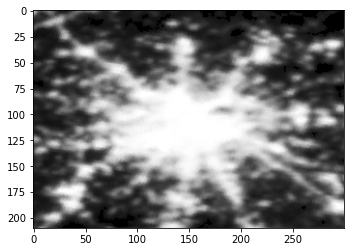

In [6]:
i, j = 2410, 26256
#imshow(img1[i-200:i, j-300: j])
imshow(img2[i-210:i, j-300: j])

Next part of the code was used to create a dictionary with positions of points of interest 

In [0]:
# cities_for_test_coords = {'Las Vegas':[4800,8000], 'Los Angeles':get_coordinates(34.0522, -118.2436), 
#                           'Guangzhou + Hong Kong':[6380, 35402], 'Moscow':[2410, 26256], 'Brightest spot': [7942, 14065]}

# import pandas as pd

# df = pd.DataFrame(cities_for_test_coords, index=['Y', 'X'])
# df.to_pickle("/content/drive/My Drive/Diploma/spots_of_interest.pkl")

In [0]:
#img_new = img1.load()
img_old = img2.load()
print(img_new.shape, img_old.shape)

(16801, 43201, 1) (16801, 43201, 1)


In [0]:
from __future__ import print_function, unicode_literals, absolute_import, division
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import plot_some
from csbdeep.io import load_training_data
from csbdeep.data import RawData, create_patches, no_background_patches

In [0]:
clip = 2000

img_new = img_new.reshape(1,16801,43201)
img_old = img_old.reshape(1,16801,43201)
img_new = np.clip(img_new, 0, clip)
#img_old = img_old * 5
print(np.max(img_new), np.max(img_old))

2000.0 63.0


In [0]:
#split images into two parts
img_cut_new = img_new[:,:-1,:-1]
img_cut_old = img_old[:,:-1,:-1]
img_new_west, img_new_east, img_old_west, img_old_east = img_cut_new[:,:,:21600], img_cut_new[:,:,21600:], img_cut_old[:,:,:21600], img_cut_old[:,:,21600:]
img_new_east.shape

(1, 16800, 21600)

In [0]:
raw_data_w = RawData.from_arrays(img_new_west, img_old_west, axes='CYX')
raw_data_e = RawData.from_arrays(img_new_east, img_old_east, axes='CYX')
print(raw_data_w)

RawData(generator=<function RawData.from_arrays.<locals>._gen at 0x7f88dbb481e0>, size=1, description='numpy array')


In [0]:
filter_img = no_background_patches(threshold=0.4, percentile=99.9)

In [0]:
X, Y, axes = create_patches(raw_data_w, (64,64), 500, save_file=base_path + '/patches/my_training_data_west_64_2000_max.npz', patch_filter=filter_img, normalization=None)
X_val, Y_val, axes_val = create_patches(raw_data_e, (64,64), 20000, save_file=base_path + '/patches/my_training_data_east_64_2000_max.npz', patch_filter=filter_img, normalization=None)

    1 raw images x    1 transformations   =     1 images
    1 images     x  500 patches per image =   500 patches in total
Input data:
numpy array
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 1/1 [00:15<00:00, 15.85s/it]


Saving data to /content/drive/My Drive/Diploma/patches/my_training_data_west_64_2000_max.npz.
    1 raw images x    1 transformations   =     1 images
    1 images     x 20000 patches per image = 20000 patches in total
Input data:
numpy array
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 1/1 [00:16<00:00, 16.77s/it]


Saving data to /content/drive/My Drive/Diploma/patches/my_training_data_east_64_2000_max.npz.


In [0]:
#(X,Y), (X_val,Y_val), axes = load_training_data('/content/drive/My Drive/Diploma/patches/my_training_data_east_256_2000_max.npz', validation_split=0.5)

20000

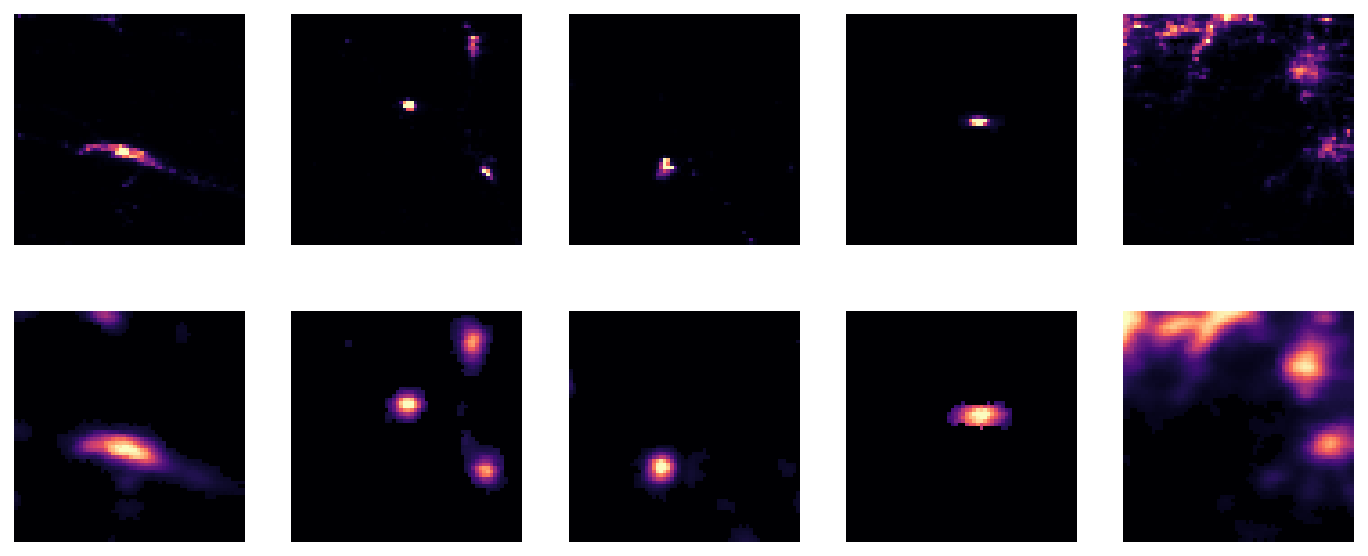

In [0]:
plt.figure(figsize=(12,5))
plot_some(X_val[0:5],Y_val[0:5], pmax=99.9)
X_val.shape[0]

In [0]:
print(np.max(X_val), np.max(Y_val))

2000.0 63.0
